# Questão 3 - Variação de preço de locação

&emsp;&emsp;Para fazer a análise da variação de preço de locação serão precisos alguns tratamentos nos dados, tais como preparação, limpeza, exploração e visualização dos dados.

&emsp;&emsp;Começaremos importando algumas bibliotecas que serão úteis no decorrer do processo.

In [1]:
import pandas as pd
import urllib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

Agora vamos começar com o tratamento dos dados. Uma fase preliminar é carregar o dataset que será analisado.

In [2]:
ab_nyc = pd.read_csv('./AB_NYC_2019.csv')

Após o carregamento do dataset, vamos analisar como está estruturado a tabela.

In [3]:
ab_nyc.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Visto que os id's, tanto o 'id' quanto o 'host_id' são números grandes, é importante descobrir qual a dimensão dos dados com que estamos trabalhando.

In [4]:
len(ab_nyc)

48895

Após o carregamento do dataset começamos com o real processamento dos dados, para entender melhor e prepará-los para as visualizações.

Vamos começar analisando os tipos de dados temos para correlacioná-los posteriormente.

In [5]:
ab_nyc.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Começaremos então a limpar e preparar nossos dados para análise.

Observando os primeiros valores da tabela, identificamos que alguns valores são tidos com nulos, para não prejudicar e incuí-los em nossas análises, principalmente na análise de média, iremos trocá-los para um valor que representa nulidade, 0.

In [6]:
ab_nyc.fillna({'reviews_per_month':0}, inplace=True)

Tendo em vista a análise que precisamos fazer e sabendo que a tabela traz dados de pessoas reais, não há necessidade de mantermos algumas colunas da tabela. Pois não vão agregar, tampouco, inteferir na criação de nossas visualizações.

Iremos remover então as colunas desnecessárias: 'id', 'host_name' e 'last_review'.

In [7]:
ab_nyc.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)
ab_nyc.head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Agora com a tabela reorganizada e com os dados limpos, é importante compreender a variedade de dados que temos. Assim, vamos agrupar aqueles campos que impactam na variação do preço de um aluguel.

Por exemplo, quando viajamos pra determinado lugar, o centro da cidade ou os bairros próximos dos pontos turísticos costumam ter valores elevados de regiões mais afastadas.

Então, vamos separar primeiro os bairros pra entender melhor a disposição da região. Recuperar os valores únicos.

In [8]:
# Começamos pelo grupo de municipios

ab_nyc.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [9]:
# pegamos os bairros pertencentes aos municipios

nh_unique = ab_nyc.neighbourhood.unique()
nh_unique

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

Uma outra coluna que nos chama atenção e que é bom entendermos sua divisão é o tipo de quarto, que influencia diretamente nos preços do aluguel.

In [10]:
ab_nyc.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Agora vamos analisar separadamente cada coluna e entender sua relação com os preços.

A primeira coluna que nos chama atenção é a de municipios, vamos analisar a relação entre localidade e preço.

In [11]:
ab_nyc.groupby('neighbourhood_group')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


Após gerar a tabela anterior, conseguimos analisar alguns fatos, a maioria dos hosts são localizados no Manhattan e no Brooklyn. Tais localidades são os municipios mais famosos e mais procurados por viajantes de Nova York. Sendo possível identificar também que é onde estão presentes os alugueis com os maiores valores, 150 e 90 dólares, respectivamente.

Além disso, os valores máximos representados na tabela destoam, e muito, da média de valores, não agregando estatísticamente na nossa análise. 

Para enxergarmos melhor a relação entre os municipios e a disposição dos preços, vamos elaborar um gráfico de violino.

Text(0.5, 1.0, 'Distribuição de preço por município')

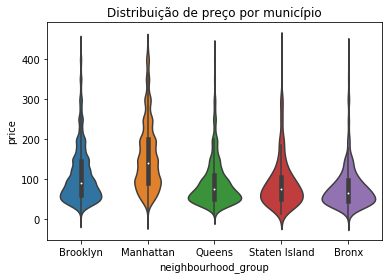

In [12]:
# Como identificado, retiraremos os valores destoantes

# '440': valor escolhido arbitrariamente 
# (2x maior do que o maior valor contido nos 75%)
sub_ab_nyc = ab_nyc[ab_nyc.price < 440]

agroup_price_viz = sns.violinplot(data=sub_ab_nyc, 
                                  x='neighbourhood_group', 
                                  y='price')
agroup_price_viz.set_title('Distribuição de preço por município')


Essa visualização nos mostra como Manhattan possui uma maior distribuição nos preços mais elevados, sendo o município com a maior quantidade de alugueis. Em Bronx e Queens, bairros mais afastados, a distribuição está mais concentrada nos menores preços e são os lugares menos procurados.

Para detalharmos ainda mais a distribuição dos preços por aluguel, seria interessante separarmos por tipo de quarto.

In [13]:
ab_nyc.pivot_table(index='neighbourhood_group', columns='room_type', values='price', aggfunc='mean')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Por ter uma alta demanda, mesmo com quartos compartilhados, Manhattan se sobressai comparado aos outros municípios. O valor médio do quarto compartilhado de Manhattan, por exemplo, fica pouco abaixo do valor médio do apartamento inteiro no Bronx.

Para complementarmos a análise por município, iremos relacionar a quantidade de tipos de quartos com a localidade. 

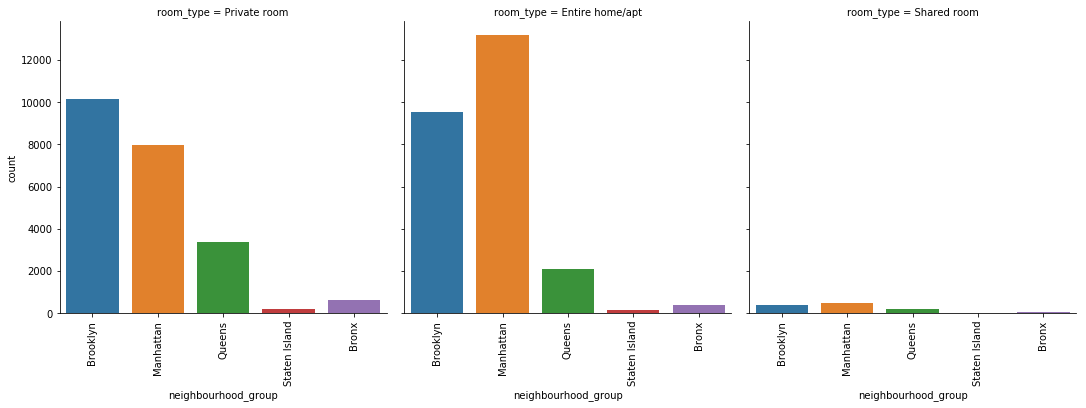

In [14]:
# Relação entre o tipo de quarto alugado (quantidade)
# por localidade

rt_ngroup_relation = sns.catplot(x='neighbourhood_group', col='room_type', data=ab_nyc, kind='count')
rt_ngroup_relation.set_xticklabels(rotation=90)


Podemos constatar a partir dessa análise que o aluguem de quarto compartilhado pouco é usado pelos usuários (viajantes) que vão para Nova York. Tendo a preferência por apartamento inteiro ou quarto inteiro.

Agora vamos analisar os bairros dos municípios que mais populares e fazer uma análise similar à anterior.

In [15]:
# Lista dos 10 bairros mais procurados
nh_ab_nyc = ab_nyc.neighbourhood.value_counts().head(10)
nh_ab_nyc

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

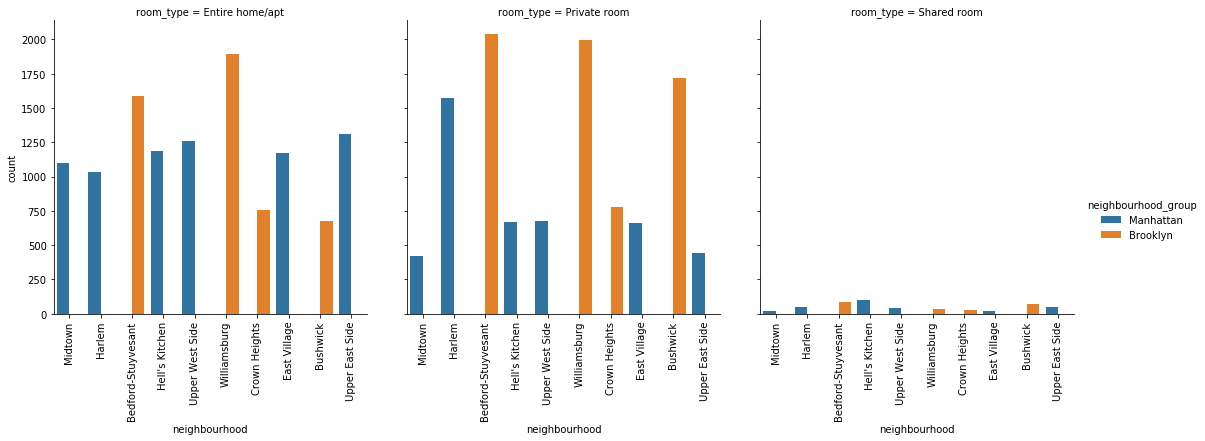

In [16]:
sub_ab_nyc=ab_nyc.loc[ab_nyc['neighbourhood']
                 .isin(['Williamsburg',
                        'Bedford-Stuyvesant',
                        'Harlem','Bushwick',
                        'Upper West Side',
                        'Hell\'s Kitchen',
                        'East Village',
                        'Upper East Side',
                        'Crown Heights',
                        'Midtown'])]

popular_nh = sns.catplot(x='neighbourhood', 
                         hue='neighbourhood_group', 
                         col='room_type', 
                         data=sub_ab_nyc, 
                         kind='count')

popular_nh.set_xticklabels(rotation=90)

Confirmando a popularidade dos 10 bairros mais frequentados e a distribuição entre os tipos de quarto alugados. Mas o que chama atenção é a quantidade de alugueis referente àos 10 bairros.

Vamos ver melhor então qual é essa diferença em comparação com o restante dos bairros.

In [17]:
# Soma de alugueis nos 10 bairros mais populares
nh_ab_nyc.sum()/ab_nyc.neighbourhood.value_counts().sum()


0.47951733306064015

In [18]:
# Soma de alugueis do restante dos bairros de Nova York
len(nh_unique)

221

Os 10 bairros que possuem o maior número de aluguel corresponde a 48% dos alugueis de Nova York, de um total de 221 bairros.

Através do mapa de calor conseguiremos ter um panorama maior da variação de preço de locação dos hosts por região.

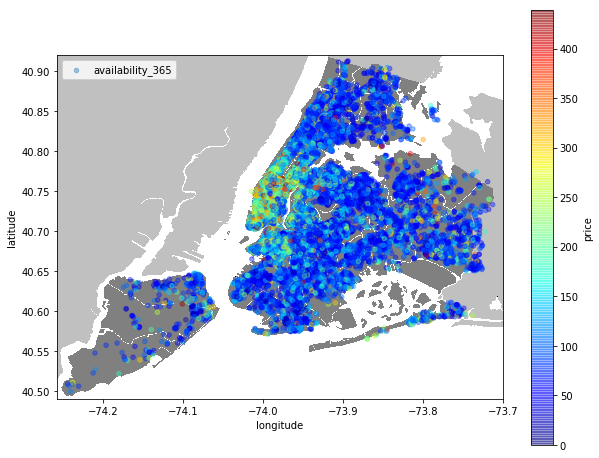

In [20]:
plt.figure(figsize=(10,8))

image = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')

nyc_map = plt.imread(image)

plt.imshow(nyc_map,
           zorder=0,
           extent=[-74.258, 
                   -73.7, 
                   40.49,
                   40.92])
axes = plt.gca()

sub_ab_nyc = ab_nyc[ab_nyc.price < 440]
heatmap = sub_ab_nyc.plot(kind='scatter', 
                          x='longitude', 
                          y='latitude', 
                          label='availability_365', 
                          c='price',
                          ax=axes,
                          cmap=plt.get_cmap('jet'), 
                          colorbar=True, 
                          alpha=0.4, 
                          zorder=5)
heatmap.legend()

O mapa de calor comprova todos os dados analisados anteriormente. A variação de preço depende da localização. Quanto maior a demanda por tais localidades, maior o preço do aluguel. Além de mostrar claramente a concentração de aluguel por região.

Por último, analisaremos a relação entre variação de preço e quantidade de reviews.

In [24]:
top_reviewed_host = ab_nyc.nlargest(10, 'number_of_reviews')
top_reviewed_host

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [25]:
# Média de preço para dos hosts com a maior quantidade de reviews
top_reviewed_host.price.mean()


65.4

Não dá para correlacionar a quantidade de reviews com a variação de preço, do jeito como está funcionando no dataset. Pois temos que a média de preço dos hosts com a maior quantidade de review fica abaixo do preço médio de quase todos os hosts (incluindo os tipos de quarto). Caso fosse separado entre reviews positivos e negativos (ou uma média entre eles), seria possível fazer essa análise.